<a href="https://colab.research.google.com/github/nasirskhan/udemy-nlp/blob/master/hackthon_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import pandas as pd
import numpy as np

import pickle
import sys
import os
import io
import re
from sys import path
import numpy as np
import pickle
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
from string import punctuation, digits
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer




input_training_file = 'train.csv'
train_data = pd.read_csv(input_training_file,delimiter=',')
#print (train_data)

print(len(train_data))

train_data.columns = ['id','label','tweet']
#train_data

train_data.isnull().sum()


#Remove tweets that are blank

blanks = []

for idx,id,lbl,twt in train_data.itertuples():
  #print(len(twt))
  if twt.isspace():
    blanks.append(idx)

print(blanks)
train_data.drop(blanks, inplace=True)
print(len(train_data))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
31962
[]
31962


   label  COUNT
1      1   2242
0      0  29720


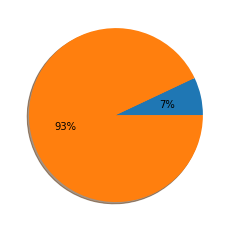

In [6]:
pd.set_option('display.width', 4000)
pd.set_option('display.max_rows', 1000)
distOfDetails = train_data.groupby(by='label', as_index=False).agg({'id': pd.Series.nunique}).sort_values(by='label', ascending=False)
distOfDetails.columns =['label', 'COUNT']
print(distOfDetails)
#Distribution of All Categories
plt.pie(distOfDetails['COUNT'],autopct='%1.0f%%',shadow=True, startangle=360)
plt.show()

#plt1.bar(x=distOfDetails['label'],height=20, bottom=distOfDetails['COUNT'],align='edge')
#plt1.show()

data = train_data


In [0]:
def nltk_vader(source_data, feature, label, output_label):
  import nltk
  p_data = source_data.copy()
  p_data[label].value_counts()
  from nltk.sentiment.vader import SentimentIntensityAnalyzer
  sia = SentimentIntensityAnalyzer()
  p_data['scores'] = p_data[feature].apply(lambda review:sia.polarity_scores(review))
  p_data['compound'] = p_data['scores'].apply(lambda d:d['compound'])
  p_data[output_label] = p_data['compound'].apply(lambda score: 0 if score>=0 else 1)
  return p_data



In [0]:
#print(t_data)
def print_metrics(y_test, predictions):
  from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

  cnf_matrix = confusion_matrix(y_test, predictions)
  clsf_report = classification_report(y_test, predictions)
  acc_score = accuracy_score(y_test, predictions)

  print(cnf_matrix)
  print(clsf_report)
  print(acc_score)



In [22]:
nltk_vader(train_data, 'tweet','label', 'compound_label')
print_metrics(t_data['label'], t_data['compound_label'])

[[24560  5160]
 [ 1357   885]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     29720
           1       0.15      0.39      0.21      2242

    accuracy                           0.80     31962
   macro avg       0.55      0.61      0.55     31962
weighted avg       0.89      0.80      0.84     31962

0.796101620674551


In [0]:
import nltk
t_data = train_data.copy()
t_data['label'].value_counts()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
t_data['scores'] = t_data['tweet'].apply(lambda review:sia.polarity_scores(review))
t_data['compound'] = t_data['scores'].apply(lambda d:d['compound'])
t_data['compound_label'] = t_data['compound'].apply(lambda score: 0 if score>=0 else 1)


In [23]:
#Text Preprocessing
columns = ['id','label', 'tweet']
df_ = pd.DataFrame(columns=columns)
#lower string
data['tweet'] = data['tweet'].str.lower()
#remove email adress
data['tweet'] = data['tweet'].replace('[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+', '', regex=True)
#remove IP address
data['tweet'] = data['tweet'].replace('((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.|$)){4}', '', regex=True)
#remove punctaitions and special chracters
data['tweet'] = data['tweet'].str.replace('[^\w\s]','')
#remove numbers
data['tweet'] = data['tweet'].replace('\d', '', regex=True)

#data

#remove stop words

stopwords_list = stopwords.words('english')
#stopwords_list.append('user')

maxwordcount = 0
for index, row in data.iterrows():
    word_tokens = word_tokenize(row['tweet'])
    #print(row['tweet'])
    #filtered_sentence = [w for w in word_tokens if not w in stopwords.words('english')]
    filtered_sentence = [w for w in word_tokens if not w in stopwords_list]
    #print(filtered_sentence)
    
    wordcount = len(filtered_sentence)
    if wordcount > maxwordcount:
      maxwordcount = wordcount
      print(maxwordcount)

#    if row['tweet'] != " ".join(filtered_sentence[0:]):
#      print(row['tweet'])
#      print(" ".join(filtered_sentence[0:]))
      
    df_ = df_.append({"id": row['id'], "label":  row['label'],"tweet": " ".join(filtered_sentence[0:])}, ignore_index=True)



data = df_



8
15
16
17
18
19
20
21
22
23
26


In [28]:
l_target = 'label'
l_feature = 'tweet'
l_computed_target = 'computed_target'
output_data = nltk_vader(train_data, l_feature, l_target, l_computed_target)
#print(output_data)
print_metrics(output_data[l_target], output_data[l_computed_target])

[[23994  5726]
 [ 1230  1012]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.87     29720
           1       0.15      0.45      0.23      2242

    accuracy                           0.78     31962
   macro avg       0.55      0.63      0.55     31962
weighted avg       0.90      0.78      0.83     31962

0.7823665602903448


In [36]:
l_target = 'label'
l_feature = 'tweet'
l_computed_target = 'computed_target'
output_data = None
output_data = nltk_vader(data, l_feature, l_target, l_computed_target)
print(output_data)
print(output_data[l_target].value_counts())
print(output_data[l_computed_target].value_counts())

print_metrics(output_data[l_target], output_data[l_computed_target])

          id label  ... compound computed_target
0          1     0  ...  -0.7650               1
1          2     0  ...   0.6705               0
2          3     0  ...   0.0000               0
3          4     0  ...   0.6369               0
4          5     0  ...   0.3400               0
...      ...   ...  ...      ...             ...
31957  31958     0  ...   0.0000               0
31958  31959     0  ...   0.4588               0
31959  31960     0  ...  -0.7351               1
31960  31961     1  ...  -0.5106               1
31961  31962     0  ...   0.3612               0

[31962 rows x 6 columns]
0    29720
1     2242
Name: label, dtype: int64
0    25469
1     6493
Name: computed_target, dtype: int64


ValueError: ignored

In [112]:
#from keras import preprocessing
#max_features = 10000
#maxlen = 20
#(x_train, y_train), (x_test, y_test) = data.load_data(
#num_words=max_features)
#x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
#x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

X_train, X_test, y_train, y_test = train_test_split(data['tweet'].values.astype('U'),data['label'].values.astype('int32'), test_size=0.15, random_state=0)
classes  = data['label'].unique()

print(len(X_train), len(y_train))

print(len(X_test), len(y_test))


27167 27167
4795 4795


In [116]:
#SVM Model

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

text_clsfr = Pipeline([('Tfidf', TfidfVectorizer()), ('clf', LinearSVC() )])
text_clsfr.fit(X_train, y_train)

predictions = text_clsfr.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predictions)
clsf_report = classification_report(y_test, predictions)
acc_score = accuracy_score(y_test, predictions)

print(cnf_matrix)
print(clsf_report)
print(acc_score)


[[4465   32]
 [ 123  175]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4497
           1       0.85      0.59      0.69       298

    accuracy                           0.97      4795
   macro avg       0.91      0.79      0.84      4795
weighted avg       0.97      0.97      0.96      4795

0.9676746611053181


In [131]:
#SGD classifier

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import SGDClassifier

text_clsfr = Pipeline([('Tfidf', TfidfVectorizer()), ('clf', SGDClassifier(alpha=1e-05,max_iter=50,penalty='elasticnet') )])
text_clsfr.fit(X_train, y_train)

predictions = text_clsfr.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predictions)
clsf_report = classification_report(y_test, predictions)
acc_score = accuracy_score(y_test, predictions)

print(cnf_matrix)
print(clsf_report)
print(acc_score)


[[4454   43]
 [ 107  191]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4497
           1       0.82      0.64      0.72       298

    accuracy                           0.97      4795
   macro avg       0.90      0.82      0.85      4795
weighted avg       0.97      0.97      0.97      4795

0.9687174139728885


In [132]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

#grid search result
vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=50000,max_df=0.5,use_idf=True, norm='l2') 
print(f"{vectorizer.min_df} {vectorizer.max_df} {vectorizer.ngram_range}")
# want to see the vectorized values
# Logistic regression

counts = vectorizer.fit_transform(X_train)
print(f"{counts.data}")

vocab = vectorizer.vocabulary_
print(vocab)
classifier = SGDClassifier(alpha=1e-05,max_iter=50,penalty='elasticnet')
#print(classifier)
#classifier = SGDClassifier(alpha=1e-05,max_iter=50)
targets = y_train
classifier = classifier.fit(counts, targets)
example_counts = vectorizer.transform(X_test)
print(example_counts)
predictions = classifier.predict(example_counts)

1 0.5 (1, 2)
[0.33 0.33 0.22 ... 0.21 0.19 0.09]
{'days': 6158, 'wohwhile': 48675, 'production': 32015, 'next': 21826, 'week': 48062, 'pretty': 31800, 'chuffed': 4458, 'lifetime': 15363, 'acting': 153, 'terms': 43974, 'pay': 26875, 'gd': 10263, 'next week': 21919, 'pretty chuffed': 31810, 'pay milkman': 26959, 'policeman': 29646, 'wife': 48483, 'mistress': 17443, 'kills': 14460, 'gets': 10443, 'life': 15227, 'prison': 31977, 'husband': 12918, 'goes': 10782, 'merry': 17187, 'way': 47916, 'consequences': 5105, 'beyond': 2479, 'policeman cheats': 29647, 'wife mistress': 48485, 'pleased': 29293, 'announce': 1107, 'upcoming': 45833, 'launch': 14869, 'online': 25386, 'platform': 29197, 'keep': 14307, 'eyes': 8358, 'clothing': 4646, 'branding': 3291, 'pleased announce': 29294, 'launch online': 14873, 'user': 45990, 'thanks': 44196, 'unc': 45702, 'fun': 10002, 'shopping': 41512, 'today': 44800, 'uncle': 45706, 'vans': 47273, 'converse': 5198, 'user thanks': 47008, 'user fun': 46369, 'shopping 

In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [118]:

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
#Model Evaluation
acc = accuracy_score(y_test, predictions, normalize=True)
hit = precision_score(y_test, predictions, average=None,labels=classes)
capture = recall_score(y_test, predictions, average=None,labels=classes)
print('Model Accuracy:%.2f'%acc)
print(classification_report(y_test, predictions))

# ROC curve, explain this to Anirban


Model Accuracy:0.97
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4497
           1       0.79      0.63      0.70       298

    accuracy                           0.97      4795
   macro avg       0.88      0.81      0.84      4795
weighted avg       0.96      0.97      0.96      4795



In [0]:
#source: https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print()
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure(figsize=(150,100))

,label,id
0,0,1
1,1,2


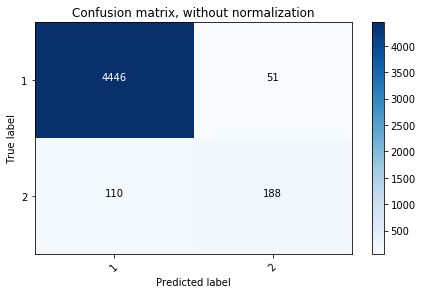

<Figure size 10800x7200 with 0 Axes>

In [120]:

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions,classes)
np.set_printoptions(precision=2)
class_names = range(1,classes.size+1)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
classInfo = pd.DataFrame(data=[])
for i in range(0,classes.size):
    classInfo = classInfo.append([[classes[i],i+1]],ignore_index=True)
classInfo.columns=['label','id']
classInfo
